# K-Means Clustering

## Importing the libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Importing the dataset

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
data = '/content/gdrive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv' 
dataset = pd.read_csv(data) 
X = dataset.iloc[:, [3, 4]].values # we choose 2 columns just to have graph in 2D

## Using the elbow method to find the optimal number of clusters

In [7]:
from sklearn.cluster import KMeans 
wcss = [] 

for i in range(1, 11): 
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
  kmeans.fit(X) 
  wcss.append(kmeans.inertia_) 


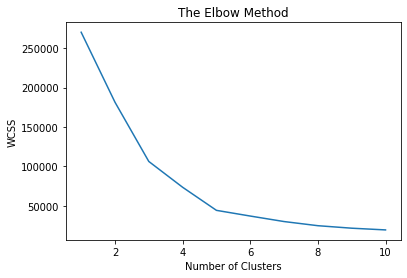

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

## Training the K-Means model on the dataset

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(X) 

In [12]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

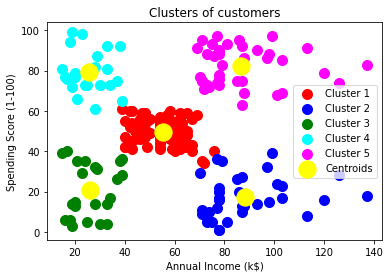

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()